# Predicting Chronic Kidney Disease
## Exploratory Data Analysis - Inferential Statistics

In [6]:
# import standard libraries
import pandas as pd
import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import utils

import warnings
warnings.simplefilter('ignore', np.RankWarning)

# set random seed
np.random.seed(22)

#set seaborn plot style
sns.set()

In [2]:
# import the wide dataframe
full_df = pd.read_csv('data/all_data_wide.csv', index_col=0)
full_df.head(3)

,TractID,All teeth lost among adults aged >=65 Years,Arthritis among adults,Binge drinking among adults,Cancer (excluding skin cancer) among adults,Cholesterol screening among adults,Chronic kidney disease among adults,Chronic obstructive pulmonary disease among adults,Coronary heart disease among adults,Current asthma among adults,...,Total | HOUSING TENURE | Renter-occupied housing units,Total | UNMARRIED-PARTNER HOUSEHOLDS | Opposite sex,Total | UNMARRIED-PARTNER HOUSEHOLDS | Same sex,Unemployment rate | Population 16 years and over,Visits-dentist or dental clinic among adults,Visits-doctor for routine checkup within the past Year among adults,StateAbbr,CityName,GeoLocation,PopulationCount
0,1073000100,30.2,32.5,10.1,5.2,72.3,3.6,11.0,8.0,12.7,...,53.5,2.1,0.0,15.9,40.9,76.3,AL,Birmingham,"(33.5794328326, -86.7228323926)",3042.0
1,1073000300,33.3,31.3,10.8,4.6,69.8,3.8,10.7,8.2,11.8,...,75.1,4.3,0.8,13.6,39.0,73.8,AL,Birmingham,"(33.5428208686, -86.752433978)",2735.0
2,1073000400,36.0,34.6,9.5,5.2,72.0,4.0,11.7,8.8,13.0,...,48.0,10.1,0.0,13.6,35.1,77.5,AL,Birmingham,"(33.5632449633, -86.7640474064)",3338.0


In [9]:
# set up feature and target variable arrays
X = full_df.drop(['Chronic kidney disease among adults','GeoLocation', 'StateAbbr','CityName'], axis=1).copy()
y = full_df.loc[:,'Chronic kidney disease among adults'].values

# impute missing values
X.fillna(X.mean(), inplace=True)

In [10]:
# encode continuous variables
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(y)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, encoded)
importances = clf.feature_importances_  
indices = np.argsort(importances)[::-1]

In [11]:
# isolate the 20 most important features
top20 = indices[:20]

# set up features dataframe
variables = full_df.drop(['Chronic kidney disease among adults','GeoLocation', 'StateAbbr','CityName'], axis=1).copy()

In [12]:
# list the top 100 most important features
top100 = variables.iloc[:,indices[:100]]
top100.columns

Index(['Stroke among adults', 'Coronary heart disease among adults',
       'Diagnosed diabetes among adults', 'High blood pressure among adults',
       'Physical health not good for >=14 days among adults',
       'High cholesterol among adults who have been screened in the past 5 Years',
       'Arthritis among adults', 'Cancer (excluding skin cancer) among adults',
       'Chronic obstructive pulmonary disease among adults',
       'Taking medicine for high blood pressure control among adults with high blood pressure',
       'Binge drinking among adults',
       'No leisure-time physical activity among adults',
       'Percent Private Coverage | COVERAGE ALONE | Private health insurance alone',
       'Employment/Population Ratio | Population 16 years and over',
       'Percent Private Coverage | COVERAGE ALONE | Private health insurance alone | Employer-based health insurance alone',
       'Obesity among adults',
       'Labor Force Participation Rate | Population 16 years and o

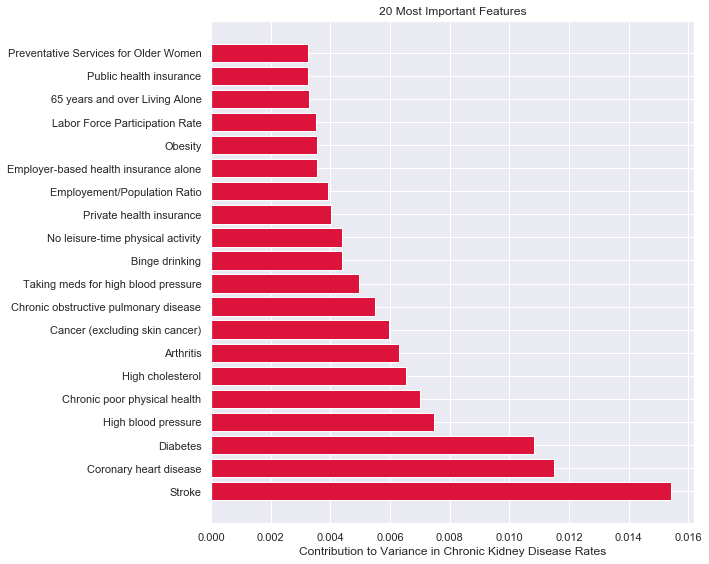

In [75]:
# plot 20 most important features
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.barh(range(20), importances[top20], color="crimson", align="center")
ylabels = ['Stroke', 'Coronary heart disease','Diabetes', 
           'High blood pressure', 'Chronic poor physical health', 'High cholesterol',
           'Arthritis', 'Cancer (excluding skin cancer)', 'Chronic obstructive pulmonary disease',
           'Taking meds for high blood pressure', 'Binge drinking',
           'No leisure-time physical activity', 'Private health insurance', 
           'Employement/Population Ratio', 'Employer-based health insurance alone',
           'Obesity', 'Labor Force Participation Rate', '65 years and over Living Alone',
            'Public health insurance','Preventative Services for Older Women']

plt.yticks(range(20), ylabels)
plt.title('20 Most Important Features')
plt.xlabel('Contribution to Variance in Chronic Kidney Disease Rates')
plt.tight_layout()
plt.savefig('img/important_features.png')
plt.show()

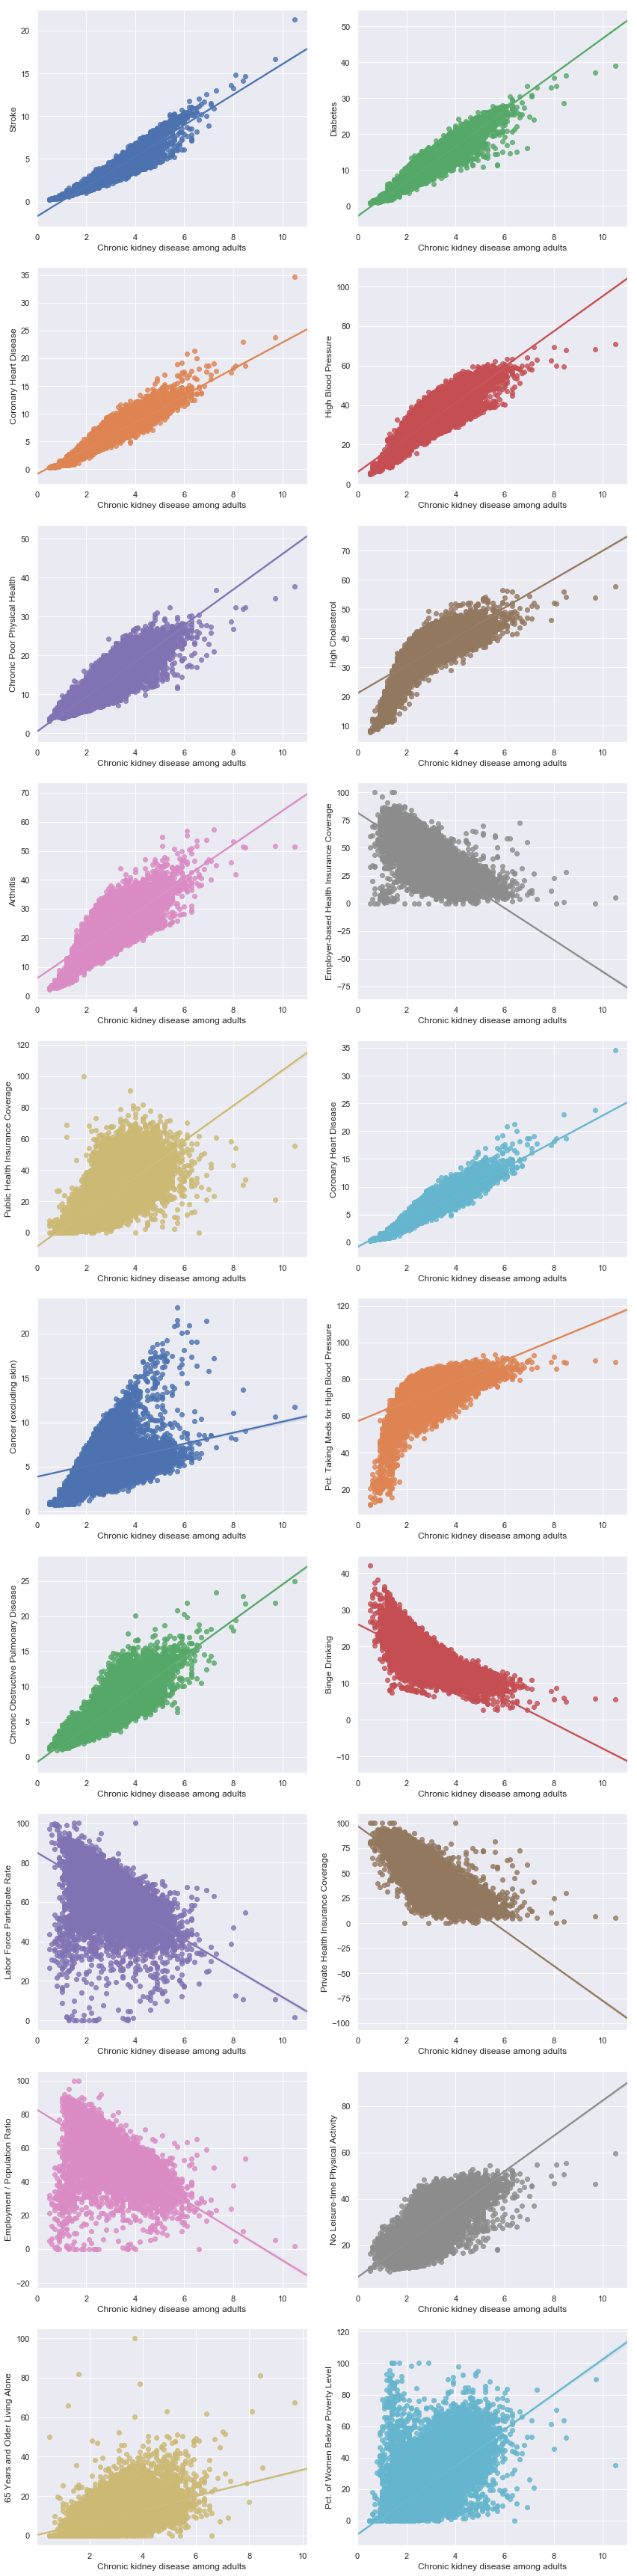

In [17]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(12,48))
sns.regplot(x='Chronic kidney disease among adults', y='Stroke among adults', data=full_df, ax=ax[0,0])
ax[0,0].set_ylabel('Stroke')
sns.regplot(x='Chronic kidney disease among adults', y='Coronary heart disease among adults', data=full_df, ax=ax[1,0])
ax[1,0].set_ylabel('Coronary Heart Disease')
sns.regplot(x='Chronic kidney disease among adults', y='Diagnosed diabetes among adults', data=full_df, ax=ax[0,1])
ax[0,1].set_ylabel('Diabetes')
sns.regplot(x='Chronic kidney disease among adults', y='High blood pressure among adults', data=full_df, ax=ax[1,1])
ax[1,1].set_ylabel('High Blood Pressure')
sns.regplot(x='Chronic kidney disease among adults', y='Physical health not good for >=14 days among adults', data=full_df, ax=ax[2,0])
ax[2,0].set_ylabel('Chronic Poor Physical Health')
sns.regplot(x='Chronic kidney disease among adults', y='High cholesterol among adults who have been screened in the past 5 Years', data=full_df, ax=ax[2,1])
ax[2,1].set_ylabel('High Cholesterol')
sns.regplot(x='Chronic kidney disease among adults', y='Arthritis among adults', data=full_df, ax=ax[3,0])
ax[3,0].set_ylabel('Arthritis')
sns.regplot(x='Chronic kidney disease among adults', y='Percent Private Coverage | COVERAGE ALONE | Private health insurance alone | Employer-based health insurance alone', data=full_df, ax=ax[3,1])
ax[3,1].set_ylabel('Employer-based Health Insurance Coverage')
sns.regplot(x='Chronic kidney disease among adults', y='Percent Public Coverage | COVERAGE ALONE | Public health insurance alone', data=full_df, ax=ax[4,0])
ax[4,0].set_ylabel('Public Health Insurance Coverage')
sns.regplot(x='Chronic kidney disease among adults', y='Coronary heart disease among adults', data=full_df, ax=ax[4,1])
ax[4,1].set_ylabel('Coronary Heart Disease')
sns.regplot(x='Chronic kidney disease among adults', y='Cancer (excluding skin cancer) among adults', data=full_df, ax=ax[5,0])
ax[5,0].set_ylabel('Cancer (excluding skin)')
sns.regplot(x='Chronic kidney disease among adults', y='Taking medicine for high blood pressure control among adults with high blood pressure', data=full_df, ax=ax[5,1])
ax[5,1].set_ylabel('Pct. Taking Meds for High Blood Pressure')
sns.regplot(x='Chronic kidney disease among adults', y='Chronic obstructive pulmonary disease among adults', data=full_df, ax=ax[6,0])
ax[6,0].set_ylabel('Chronic Obstructive Pulmonary Disease')
sns.regplot(x='Chronic kidney disease among adults', y='Binge drinking among adults', data=full_df, ax=ax[6,1])
ax[6,1].set_ylabel('Binge Drinking')
sns.regplot(x='Chronic kidney disease among adults', y='Labor Force Participation Rate | Population 16 years and over', data=full_df, ax=ax[7,0])
ax[7,0].set_ylabel('Labor Force Participate Rate')
sns.regplot(x='Chronic kidney disease among adults', y='Percent Private Coverage | COVERAGE ALONE | Private health insurance alone', data=full_df, ax=ax[7,1])
ax[7,1].set_ylabel('Private Health Insurance Coverage')
sns.regplot(x='Chronic kidney disease among adults', y='Employment/Population Ratio | Population 16 years and over', data=full_df, ax=ax[8,0])
ax[8,0].set_ylabel('Employment / Population Ratio')
sns.regplot(x='Chronic kidney disease among adults', y='No leisure-time physical activity among adults', data=full_df, ax=ax[8,1])
ax[8,1].set_ylabel('No Leisure-time Physical Activity')
sns.regplot(x='Chronic kidney disease among adults', y='Occupied housing units | HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER | Nonfamily households | Householder living alone | Householder 65 years and over', data=full_df, ax=ax[9,0])
ax[9,0].set_ylabel('65 Years and Older Living Alone')
sns.regplot(x='Chronic kidney disease among adults', y='Percent below poverty level | Female', data=full_df, ax=ax[9,1])
ax[9,1].set_ylabel('Pct. of Women Below Poverty Level')
plt.tight_layout()

## Examine the Role of Labor Participation on Rates of CKD
**H<sub>0</sub>**: There is no relationship between rates of labor participation and chronic kidney disease.<br />
$\alpha$ = 0.01

In [18]:
labor = full_df[['Chronic kidney disease among adults','Labor Force Participation Rate | Population 16 years and over']].copy()
labor.columns = ['CKD','Labor_Participation']
labor.describe()

,CKD,Labor_Participation
count,26697.000000,26697.000000
mean,2.746252,64.883908
std,0.823851,10.010748
min,0.500000,0.000000
25%,2.200000,59.600000
50%,2.600000,65.700000
75%,3.100000,71.300000
max,10.500000,100.000000


In [19]:
# descriptive statistics of labor participation and CKD
n = len(labor)
mean_labor = labor.Labor_Participation.mean()
std_labor = labor.Labor_Participation.std()

mean_ckd = labor.CKD.mean()
std_ckd = labor.CKD.std()

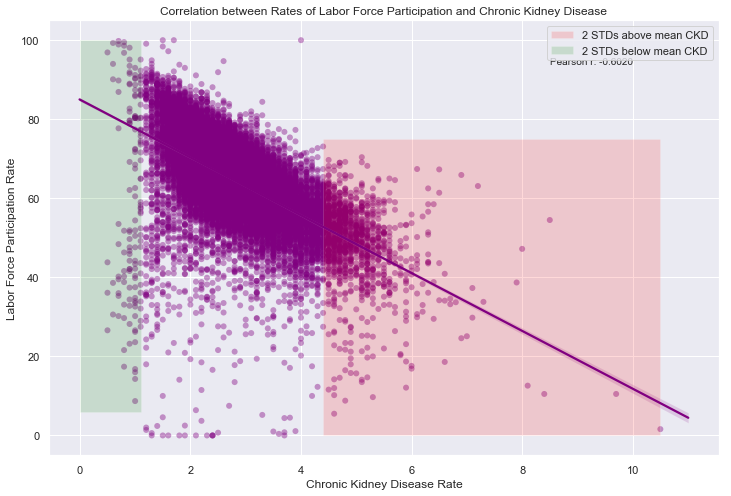

In [20]:
# plot the correlation between Labor Force Participation and CKD rates
fig, ax1 = plt.subplots(figsize=(12,8))
sns.regplot(x='CKD', y='Labor_Participation', data=labor, 
            color='purple', scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax1)

# highlight area of CKD rates 2 deviations above the mean
ax1.fill_between([mean_ckd+2*std_ckd,10.5], 0, 75, facecolor='red', 
                 alpha = .15, interpolate=True, label='2 STDs above mean CKD')

# highlight area of CKD rates 2 deviations below the mean
ax1.fill_between([0, mean_ckd-2*std_ckd], 6, 100, facecolor='green', 
                 alpha = .15, interpolate=True, label='2 STDs below mean CKD')

# calculate and print Pearson's r value
r, pval = stats.pearsonr(x=labor.CKD, y=labor.Labor_Participation)
r_str = 'Pearson r: {:.4f}'.format(r)
ax1.text(x=8.5, y=94, s=r_str, fontsize=10)

ax1.set_ylabel('Labor Force Participation Rate')
ax1.set_xlabel('Chronic Kidney Disease Rate')
ax1.set_title('Correlation between Rates of Labor Force Participation and Chronic Kidney Disease')
ax1 = plt.legend()
plt.savefig('img/labor_ckd_scatter.png')

In [21]:
# create dataframes based on rates of CKD
low_ckd = labor[labor.CKD <= (mean_ckd - 2 * std_ckd)] # more than 2 standard deviations below mean
norm_ckd = labor[(labor.CKD > (mean_ckd - 2 * std_ckd)) & (labor.CKD < (mean_ckd + 2 * std_ckd))]
high_ckd = labor[labor.CKD >= (mean_ckd + 2 * std_ckd)] # more than 2 standard deviations above mean

# compute counts
n_low = len(low_ckd)
n_norm = len(norm_ckd)
n_high = len(high_ckd)

print('No. of Census Tracts Based on Rates of CKD')
print(' Low CKD Rates:', n_low, '\n Normal CKD Rates:', n_norm, '\n High CKD Rates:', n_high)

No. of Census Tracts Based on Rates of CKD
 Low CKD Rates: 108 
 Normal CKD Rates: 25210 
 High CKD Rates: 1379


In [22]:
# calculate mean labor participation rates based on CKD rates
mean_labor_high = high_ckd.Labor_Participation.mean()
mean_labor_low = low_ckd.Labor_Participation.mean()
mean_ckd_high = high_ckd.CKD.mean()
mean_ckd_low = low_ckd.CKD.mean()

# calculate standard error
std_labor_high = high_ckd.Labor_Participation.std()
std_labor_low = low_ckd.Labor_Participation.std()

print('All Tracts')
print(' Mean CKD rate:{0:.3f}\n Mean labor participation rate: {1:.2f}%\n Standard error of labor participation rate: {2:.2f}%'.format(mean_ckd, mean_labor, std_labor))
print('-'*100)
print('Tracts with Low Rates of CKD')
print(' Mean CKD rate: {0:.3f}\n Mean labor participation rate: {1:.2f}%\n Standard error of labor participation rate: {2:.2f}%'.format(mean_ckd_low, mean_labor_low, std_labor_low))
print('-'*100)
print('Tracts with High Rates of CKD')
print(' Mean CKD rate: {0:.3f}\n Mean labor participation rate: {1:.2f}%\n Standard error of labor participation rate: {2:.2f}%'.format(mean_ckd_high, mean_labor_high, std_labor_high))

All Tracts
 Mean CKD rate:2.746
 Mean labor participation rate: 64.88%
 Standard error of labor participation rate: 10.01%
----------------------------------------------------------------------------------------------------
Tracts with Low Rates of CKD
 Mean CKD rate: 0.880
 Mean labor participation rate: 58.94%
 Standard error of labor participation rate: 25.97%
----------------------------------------------------------------------------------------------------
Tracts with High Rates of CKD
 Mean CKD rate: 4.912
 Mean labor participation rate: 49.32%
 Standard error of labor participation rate: 9.63%


In [23]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

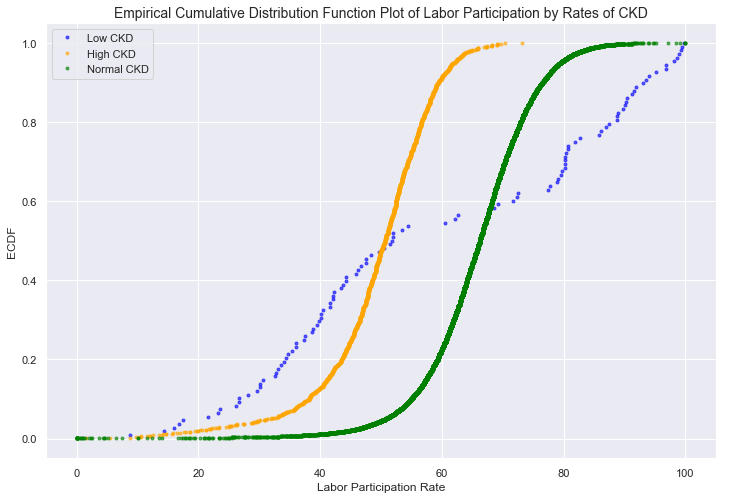

In [76]:
x_low, y_low = ecdf(low_ckd.Labor_Participation)
x_high, y_high = ecdf(high_ckd.Labor_Participation)
x_norm, y_norm = ecdf(norm_ckd.Labor_Participation)

# plot ECDFs
fig, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(x_low, y_low, label='Low CKD', color='blue', marker='.', linestyle='None', alpha=0.6)
ax2.plot(x_high, y_high, label='High CKD', color='orange', marker='.', linestyle='None', alpha=0.6)
ax2.plot(x_norm, y_norm, label='Normal CKD', color='green', marker='.', linestyle='None', alpha=0.6)
ax2.set_title('Empirical Cumulative Distribution Function Plot of Labor Participation by Rates of CKD', fontsize=14)
ax2.set_xlabel('Labor Participation Rate')
ax2.set_ylabel('ECDF')
ax2 = plt.legend()
plt.savefig('img/ecdf_labor_ckd.png')

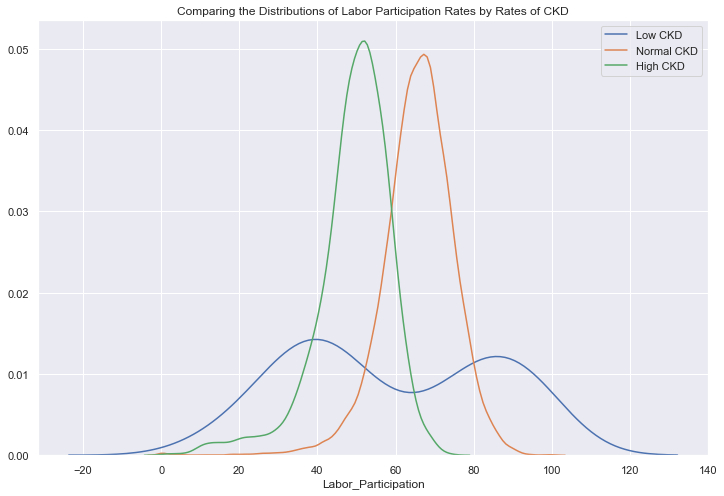

In [25]:
fig, ax3 = plt.subplots(figsize=(12,8))
sns.distplot(low_ckd.Labor_Participation, hist=False, label='Low CKD', ax=ax3)
sns.distplot(norm_ckd.Labor_Participation,hist=False, label='Normal CKD', ax=ax3)
sns.distplot(high_ckd.Labor_Participation,hist=False, label='High CKD', ax=ax3)
ax3.set_title('Comparing the Distributions of Labor Participation Rates by Rates of CKD')
ax3 = plt.legend()

In [26]:
var = np.sqrt((std_labor_low**2 / len(low_ckd)) + (std_labor_high**2 / len(high_ckd)))
diff_means = mean_labor_low - mean_labor_high
std_diff = np.sqrt((std_labor_low**2 / len(low_ckd.Labor_Participation)) + (std_labor_high**2 / len(high_ckd.Labor_Participation)))

# generate a normal distribution assuming the null hypothesis
diff_normal_null = np.random.normal(0, std_diff, 10000)
print('Null Hypothesis 99% confidence interval: {}'.format(np.percentile(diff_normal_null, [0.5, 99.5])))

# generate a normal distribution with sample data
diff_normal_sample = np.random.normal(diff_means, std_diff, 10000)
print('Normal 99% confidence interval: {}'.format(np.percentile(diff_normal_sample, [0.5,99.5])))
print('Difference of means: {:.4f}'.format(diff_means))

#calculate the z-score
z_score = diff_means / std_diff
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistics
t_stat, p = stats.ttest_ind(low_ckd.Labor_Participation, high_ckd.Labor_Participation)
print('-'*100)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

Null Hypothesis 99% confidence interval: [-6.54828793  6.43825101]
Normal 99% confidence interval: [ 3.09192407 16.22135806]
Difference of means: 9.6220
z-score: 3.83
p-value: 0.0001
----------------------------------------------------------------------------------------------------
t-statistic = 8.30
p-value = 0.0000


In [27]:
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [28]:
# create empty arrays for bootstrapping
low_replicates = np.empty(10000)
high_replicates = np.empty(10000)

# bootstrap 10,000 replicate sample means
for i in range(10000):
    low_replicates[i] = bootstrap_replicates(data=low_ckd.Labor_Participation)
    high_replicates[i] = bootstrap_replicates(data=high_ckd.Labor_Participation)

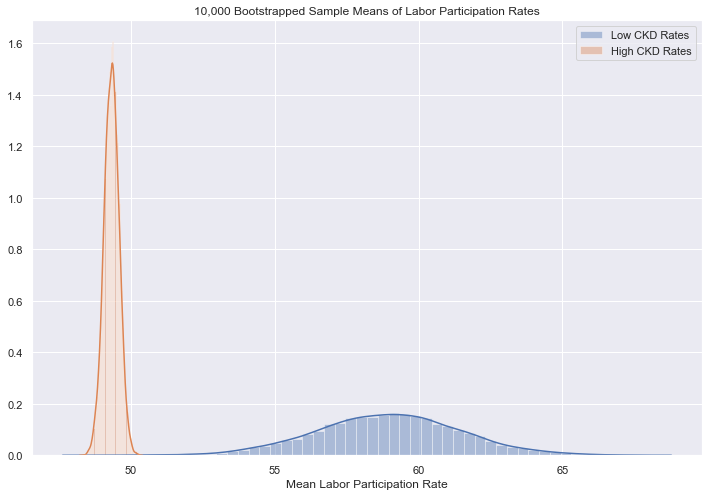

In [29]:
# plot the bootstrapped low_ckd vs high_ckd Labor Participation means
fig, ax4 = plt.subplots(figsize=(12,8))

# draw the distribution of the sample means
sns.distplot(low_replicates, label='Low CKD Rates', ax=ax4)

# draw the distribution of the null hypothesis
sns.distplot(high_replicates, label='High CKD Rates', ax=ax4)

ax4.set_xlabel('Mean Labor Participation Rate')
ax4.set_title('10,000 Bootstrapped Sample Means of Labor Participation Rates')
ax4 = plt.legend()

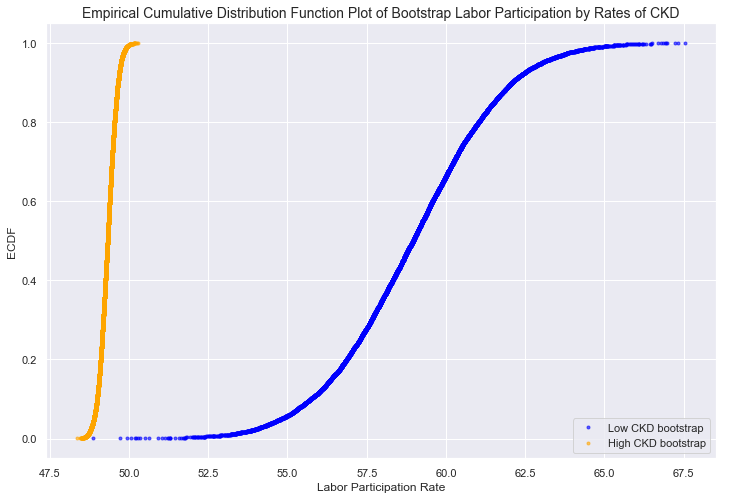

In [30]:
x_low_bs, y_low_bs = ecdf(low_replicates)
x_high_bs, y_high_bs = ecdf(high_replicates)

# plot ECDFs
fig, ax5 = plt.subplots(figsize=(12,8))
ax5.plot(x_low_bs, y_low_bs, label='Low CKD bootstrap', color='blue', marker='.', linestyle='None', alpha=0.6)
ax5.plot(x_high_bs, y_high_bs, label='High CKD bootstrap', color='orange', marker='.', linestyle='None', alpha=0.6)
ax5.set_title('Empirical Cumulative Distribution Function Plot of Bootstrap Labor Participation by Rates of CKD', fontsize=14)
ax5.set_xlabel('Labor Participation Rate')
ax5.set_ylabel('ECDF')
ax5 = plt.legend()

In [31]:
# calculate Pearson correlation coefficent
print('Pearson Correlation Coefficient: {:.4f}'.format(stats.pearsonr(low_replicates, high_replicates)[0]))

Pearson Correlation Coefficient: 0.0080


In [32]:
# Calculate mean and standard deviation high CKD bootstrap samples
high_bs_mu = np.mean(high_replicates)
high_bs_s = np.std(high_replicates)

# Calculate mean and standard deviation low CKD bootstrap samples
low_bs_mu = np.mean(low_replicates)
low_bs_s = np.std(low_replicates)

# calculate difference in means
mean_diff_bs = low_bs_mu - high_bs_mu

# calculate the Standard Error of means
std_diff_bs = np.sqrt((low_bs_s**2 / len(low_replicates)) + (high_bs_s**2 / len(high_replicates)))

# Generate a normal distribution assuming the null hypothesis
diff_normal_bs = np.random.normal(0, std_diff_bs, 10000)
                          
#Calculate the 95% Confidence interval
print('99% Confidence Interval of Null Hypothesis: {}'.format(np.percentile(diff_normal_bs, [0.5,99.5])))

#calculate the z-score
z_score = (mean_diff_bs - 0) / std_diff_bs
print('Difference of means: {:.4f}'.format(mean_diff_bs))
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistic
t_stat, p = stats.ttest_ind(low_replicates, high_replicates)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

99% Confidence Interval of Null Hypothesis: [-0.0650987   0.06567539]
Difference of means: 9.6188
z-score: 384.31
p-value: 0.0000
t-statistic = 384.29
p-value = 0.0000


### Use pairs bootstrap linear regression to test null hypothesis

In [33]:
# pairs bootstrap labor participation and ckd
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    bs_r = np.empty(size)
    bs_pval = np.empty(size)
    bs_r2 = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        bs_r[i], bs_pval[i] = stats.pearsonr(x[bs_inds], y[bs_inds])
        bs_r2[i] = bs_r[i]**2
    return bs_slope_reps, bs_intercept_reps, bs_r, bs_pval, bs_r2

In [34]:
bs_slopes, bs_ints, bs_r, bs_pval, bs_r2 = draw_bs_pairs_linreg(x=labor['CKD'], y=labor['Labor_Participation'], size=10000)

In [35]:
# calculate confidence intervals for slope
ci_99 = np.percentile(bs_slopes, [0.5, 99.5])
mean_slope = np.mean(bs_slopes)
print('99% Confidence Interval for Slope: ({0:.5f},{1:.5f})\nMean slope:{2:.5f}'.format(ci_99[0], ci_99[1], mean_slope))
print('-'*100)

# calculate confidence intervals for Pearson r
r_ci_99 = np.percentile(bs_r, [0.5, 99.5])
mean_pearson = np.mean(bs_r)       
print('99% Confidence Interval for Pearson-r: ({0:.5f},{1:.5f})\nMean Pearson-r:{2:.5f}'.format(r_ci_99[0], r_ci_99[1], mean_pearson))
print('-'*100)

# calculate confidence intervals for r-squared
r2_ci_99 = np.percentile(bs_r2, [0.5, 99.5])
print('99% Confidence Interval for r\u00b2: ({0:.5f}, {1:.5f})'.format(r2_ci_99[0], r2_ci_99[1]))

99% Confidence Interval for Slope: (-7.51882,-7.10968)
Mean slope:-7.31465
----------------------------------------------------------------------------------------------------
99% Confidence Interval for Pearson-r: (-0.62024,-0.58311)
Mean Pearson-r:-0.60199
----------------------------------------------------------------------------------------------------
99% Confidence Interval for r²: (0.34002, 0.38470)


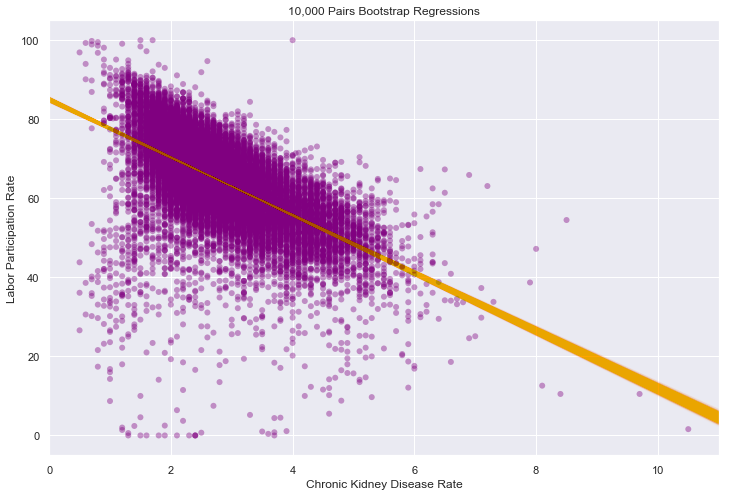

In [77]:
# plot pairs bootstrap 
x = np.array([0,11])

fig, ax6 = plt.subplots(figsize=(12,8))
ax6.scatter(x=labor['CKD'], y=labor['Labor_Participation'], 
            alpha=0.4, edgecolor='None', color='purple')
for i in range(10000):
    ax6.plot(x, bs_slopes[i] * x + bs_ints[i], linewidth=0.5, alpha=0.02, color='orange')
ax6.set_ylabel('Labor Participation Rate')
ax6.set_xlabel('Chronic Kidney Disease Rate')
ax6.set_title('10,000 Pairs Bootstrap Regressions')
ax6.margins(0,0.05)
plt.savefig('img/pairs_bs_labor.png')

## Examine the Correlation between Types of Insurance and Rates of CKD
H<sub>0</sub>: The type of insurance does not affect the rate of CKD. (i.e. There rate of CKD is the same no matter what type of insurance you have)

$\alpha$: 0.01

In [37]:
# create a dataframe of ckd and types of insurance
insurance = full_df[['Chronic kidney disease among adults', 
                     'Percent Private Coverage | COVERAGE ALONE | Private health insurance alone',
                     'Percent Public Coverage | COVERAGE ALONE | Public health insurance alone',
                     'Current lack of health insurance among adults aged 18–64 Years'
                    ]].copy()
insurance.columns = ['CKD', 'Private', 'Public', 'No_Insurance']
insurance.describe()

,CKD,Private,Public,No_Insurance
count,26697.000000,26684.000000,26684.000000,26697.000000
mean,2.746252,49.067763,22.075450,17.531182
std,0.823851,18.931956,13.571828,9.951117
min,0.500000,0.000000,0.000000,2.400000
25%,2.200000,33.800000,10.900000,9.900000
50%,2.600000,49.900000,19.700000,15.100000
75%,3.100000,64.200000,31.200000,22.900000
max,10.500000,100.000000,100.000000,64.100000


In [38]:
insurance.dropna(how='any', axis=0, inplace=True)
insurance.reset_index(inplace=True)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 5 columns):
index           26684 non-null int64
CKD             26684 non-null float64
Private         26684 non-null float64
Public          26684 non-null float64
No_Insurance    26684 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.0 MB


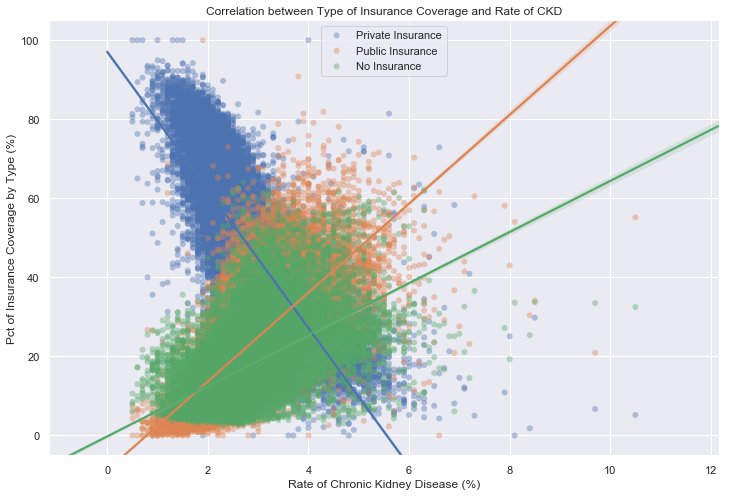

In [39]:
# create scatter plots of type of insurance vs rate of CKD
fig, ax7 = plt.subplots(figsize=(12,8))
sns.regplot(x='CKD', y='Private', data=insurance, label='Private Insurance',
            scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax7)
sns.regplot(x='CKD', y='Public', data=insurance, label='Public Insurance',
            scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax7)
sns.regplot(x='CKD', y='No_Insurance', data=insurance, label='No Insurance',
            scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax7)
ax7.set_title('Correlation between Type of Insurance Coverage and Rate of CKD')
ax7.set_ylim(bottom=-5, top=105)
ax7.set_ylabel('Pct of Insurance Coverage by Type (%)')
ax7.set_xlabel('Rate of Chronic Kidney Disease (%)')
ax7 = plt.legend()

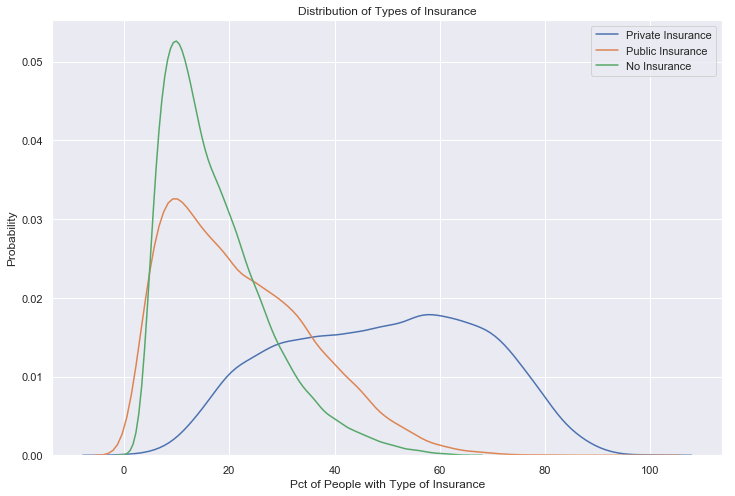

In [40]:
# Plot the distributions of types of insurance
fig, ax8 = plt.subplots(figsize=(12,8))
sns.distplot(insurance.Private, hist=False, ax=ax8, label='Private Insurance')
sns.distplot(insurance.Public, hist=False, ax=ax8, label='Public Insurance')
sns.distplot(insurance.No_Insurance, hist=False, ax=ax8, label='No Insurance')
ax8.set_ylabel('Probability')
ax8.set_xlabel('Pct of People with Type of Insurance')
ax8.set_title('Distribution of Types of Insurance')
ax8 = plt.legend()

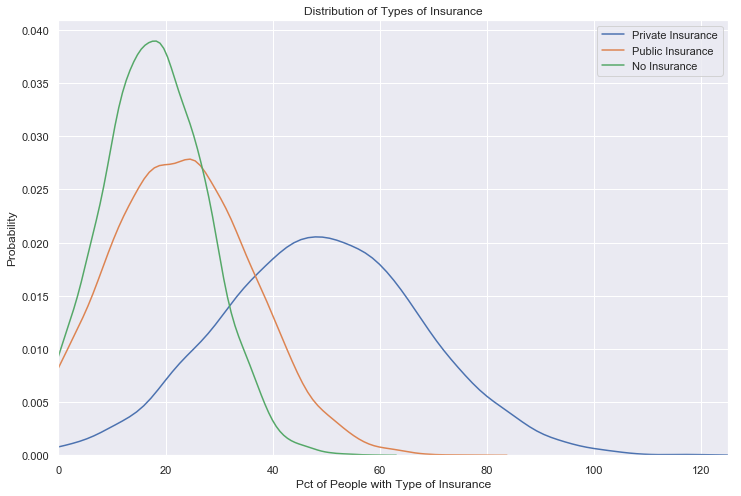

In [41]:
public_norm = np.random.normal(insurance.Public.mean(), insurance.Public.std(), 10000)
private_norm = np.random.normal(insurance.Private.mean(), insurance.Private.std(), 10000)
no_norm = np.random.normal(insurance.No_Insurance.mean(), insurance.No_Insurance.std(), 10000)

# Plot the normal distributions of types of insurance
fig, ax9 = plt.subplots(figsize=(12,8))
sns.distplot(private_norm, hist=False, ax=ax9, label='Private Insurance')
sns.distplot(public_norm, hist=False, ax=ax9, label='Public Insurance')
sns.distplot(no_norm, hist=False, ax=ax9, label='No Insurance')
ax9.set_ylabel('Probability')
ax9.set_xlabel('Pct of People with Type of Insurance')
ax9.set_title('Distribution of Types of Insurance')
ax9.set_xlim(0,125)
ax9 = plt.legend()

In [43]:
def diff_of_means(x1, x2):
    var = np.sqrt((x1.std()**2 / len(x1)) + (x2.std()**2 / len(x2)))
    diff_means = x1.mean() - x2.mean()
    
    # generate a normal distribution with sample data
    diff_normal_sample = np.random.normal(diff_means, var, 10000)
    
    # generate a normal distribution assuming the null hypothesis
    diff_normal_null = np.random.normal(0, var, 10000)
    
    #calculate the z-score
    z_score = diff_means / var
    
    # calculate t-statistics
    t_stat, p = stats.ttest_ind(x1, x2)
    
    return diff_means, diff_normal_null, diff_normal_sample, z_score, t_stat, p

diff, diff_null, diff_norm, z, t, p = diff_of_means(insurance.Public, insurance.No_Insurance)
    
print('99% confidence interval assuming the nulll hypothesis: {}'.format(np.percentile(diff_null, [0.5,99.5])))
print('Normal 99% confidence interval: {}'.format(np.percentile(diff_norm, [0.5,99.5])))
print('Difference of means: {:.4f}'.format(diff))

print('z-score: {:.2f}'.format(z))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z)))

print('-'*100)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t,p))

99% confidence interval assuming the nulll hypothesis: [-0.26040339  0.2659999 ]
Normal 99% confidence interval: [4.2907105 4.8187324]
Difference of means: 4.5488
z-score: 44.15
p-value: 0.0000
----------------------------------------------------------------------------------------------------
t-statistic = 44.15
p-value = 0.0000


In [44]:
# pairs bootstrap samples for types of insurance
priv_slopes, priv_ints, priv_r, priv_pval, priv_r2 = draw_bs_pairs_linreg(x=insurance['CKD'], y=insurance['Private'], size=10000)
pub_slopes, pub_ints, pub_r, pub_pval, pub_r2 = draw_bs_pairs_linreg(x=insurance['CKD'], y=insurance['Public'], size=10000)
no_slopes, no_ints, no_r, no_pval, no_r2 = draw_bs_pairs_linreg(x=insurance['CKD'], y=insurance['No_Insurance'], size=10000)

In [ ]:
# plot pairs bootstrap 
x = np.array([0,11])

fig, ax10 = plt.subplots(figsize=(12,8))
ax10.scatter(x=insurance['CKD'], y=insurance['Public'], label='Public Health Insurance',
            alpha=0.4, edgecolor='None', color='seagreen')
ax10.scatter(x=insurance['CKD'], y=insurance['Private'], label='Private Health Insurance',
            alpha=0.4, edgecolor='None', color='darkgoldenrod')
ax10.scatter(x=insurance['CKD'], y=insurance['No_Insurance'], label='No Insurance',
            alpha=0.4, edgecolor='None', color='cornflowerblue')

for i in range(10000):
    ax10.plot(x, pub_slopes[i] * x + pub_ints[i], linewidth=0.5, alpha=0.02, color='green')
    ax10.plot(x, priv_slopes[i] * x + priv_ints[i], linewidth=0.5, alpha=0.02, color='orange')
    ax10.plot(x, no_slopes[i] * x + no_ints[i], linewidth=0.5, alpha=0.02, color='blue')
ax10.set_ylabel('Pct of People Insurance by Type')
ax10.set_xlabel('Chronic Kidney Disease Rate')
ax10.set_title('10,000 Pairs Bootstrap Regressions')
ax10.set_ylim(-2, 102)
ax10 = plt.legend()
plt.savefig('img/pairs_bs_insurance.png')

In [46]:
# calculate stats for difference of mean slope for Public and No Insurance
diff, diff_null, diff_norm, z, t, p = diff_of_means(pub_slopes, no_slopes)

print('Difference of Means Statistics')
print('99% confidence interval for difference of means assuming the nulll hypothesis: {}'.format(np.percentile(diff_null, [0.5,99.5])))
print('Normal 99% confidence interval for difference of means: {}'.format(np.percentile(diff_norm, [0.5,99.5])))
print('Sample difference of means: {:.4f}'.format(diff))

print('z-score: {:.2f}'.format(z))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z)))

print('-'*100)
print('99% confidence interval for slope of Private Health Insurance: {}'.format(np.percentile(priv_slopes, [0.5, 99.5])))

# calculate stats for difference of mean Pearson r for Public and No Insurance
diff, diff_null, diff_norm, z, t, p = diff_of_means(pub_r, no_r)
print('-'*100)
print('Difference of Pearson r')
print('Normal 99% confidence interval for difference of means: {}'.format(np.percentile(diff_norm, [0.5,99.5])))
print('Sample difference of means: {:.4f}'.format(diff))

print('z-score: {:.2f}'.format(z))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z)))

Difference of Means Statistics
99% confidence interval for difference of means assuming the nulll hypothesis: [-0.00330015  0.0033317 ]
Normal 99% confidence interval for difference of means: [4.77332466 4.77994053]
Sample difference of means: 4.7767
z-score: 3714.96
p-value: 0.0000
----------------------------------------------------------------------------------------------------
99% confidence interval for slope of Private Health Insurance: [-17.78351261 -17.12623049]
----------------------------------------------------------------------------------------------------
Difference of Pearson r
Normal 99% confidence interval for difference of means: [0.14709771 0.1474037 ]
Sample difference of means: 0.1473
z-score: 2518.91
p-value: 0.0000


## Examing the Effect of People Over the Age of 65 Living Alone
H<sub>0</sub>: The percentage of people over the age of 65 who are living alone has no effect on the rate of CKD.

$\alpha$: 0.01

In [47]:
alone = full_df[['Chronic kidney disease among adults', 'Occupied housing units | HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER | Nonfamily households | Householder living alone | Householder 65 years and over']].copy()
alone.columns = ['CKD', 'Living_Alone']
alone.Living_Alone.fillna(alone.Living_Alone.mean(), inplace=True)
alone.describe()

,CKD,Living_Alone
count,26697.000000,26697.000000
mean,2.746252,9.196961
std,0.823851,6.083325
min,0.500000,0.000000
25%,2.200000,5.000000
50%,2.600000,8.100000
75%,3.100000,12.000000
max,10.500000,100.000000


In [48]:
alone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 26696
Data columns (total 2 columns):
CKD             26697 non-null float64
Living_Alone    26697 non-null float64
dtypes: float64(2)
memory usage: 625.7 KB


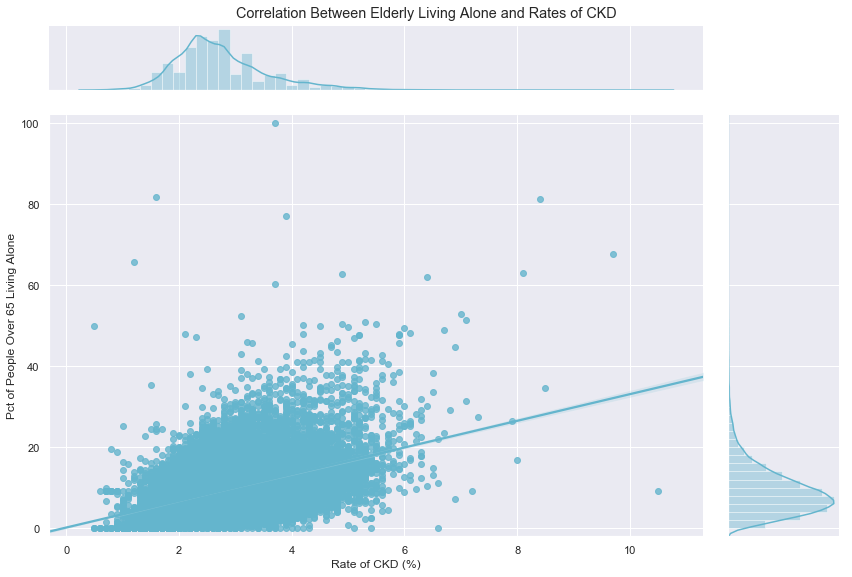

In [49]:
# plot CKD vs Living Alone
#fig, ax10 = plt.subplots(figsize=(12,8))
ax11 = sns.jointplot(x='CKD', y='Living_Alone', data=alone, color='c', kind='reg', ylim=(-2, 102))
ax11.fig.set_figwidth(12)
ax11.fig.set_figheight(8)
ax11.set_axis_labels('Rate of CKD (%)', 'Pct of People Over 65 Living Alone')

ax11.fig.suptitle('Correlation Between Elderly Living Alone and Rates of CKD', va='top', position=(0.5, 1.0))
ax11.fig.tight_layout()
plt.savefig('img/live_alone_ckd.png')

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(alone.CKD, alone.Living_Alone)
print('Slope: {0:.4f}\nIntercept: {1:.4f}\nR: {2:.4f}\np-value: {3:.4f}\nStandard Error: {4:.4f}'.format(slope, intercept, r_value, p_value, std_err))

Slope: 3.2926
Intercept: 0.1545
R: 0.4459
p-value: 0.0000
Standard Error: 0.0405


In [51]:
import statsmodels.api as sm
X = alone.CKD
y = alone.Living_Alone.fillna(alone.Living_Alone.mean())
ckd_ols = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y, ckd_ols).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Living_Alone   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     6625.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:52:37   Log-Likelihood:                -83124.
No. Observations:               26697   AIC:                         1.663e+05
Df Residuals:                   26695   BIC:                         1.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1545      0.116      1.333      0.1

In [52]:
# calculate correlation coefficient using Spearman rho
stats.spearmanr(alone.CKD, alone.Living_Alone)

SpearmanrResult(correlation=0.41491511752022314, pvalue=0.0)

In [53]:
alone_slopes, alone_ints, alone_r, alone_pval, alone_r2 = draw_bs_pairs_linreg(x=alone['CKD'], y=alone['Living_Alone'], size=10000)

In [54]:
# calculate confidence intervals for slope
ci_99 = np.percentile(alone_slopes, [0.5, 99.5])
mean_slope = np.mean(alone_slopes)
print('99% Confidence Interval for Slope: ({0:.5f},{1:.5f})\nMean slope:{2:.5f}'.format(ci_99[0], ci_99[1], mean_slope))
print('-'*100)

# calculate confidence intervals for Pearson r
r_ci_99 = np.percentile(alone_r, [0.5, 99.5])
mean_pearson = np.mean(alone_r)       
print('99% Confidence Interval for Pearson-r: ({0:.5f},{1:.5f})\nMean Pearson-r:{2:.5f}'.format(r_ci_99[0], r_ci_99[1], mean_pearson))
print('-'*100)

# calculate confidence intervals for r-squared
r2_ci_99 = np.percentile(alone_r2, [0.5, 99.5])
mean_r2 = np.mean(alone_r2)
print('99% Confidence Interval for r\u00b2: ({0:.5f}, {1:.5f})\nMean r\u00b2: {2:.5f}'.format(r2_ci_99[0], r2_ci_99[1], mean_r2))

99% Confidence Interval for Slope: (3.13677,3.45357)
Mean slope:3.29293
----------------------------------------------------------------------------------------------------
99% Confidence Interval for Pearson-r: (0.42763,0.46320)
Mean Pearson-r:0.44589
----------------------------------------------------------------------------------------------------
99% Confidence Interval for r²: (0.18287, 0.21456)
Mean r²: 0.19887


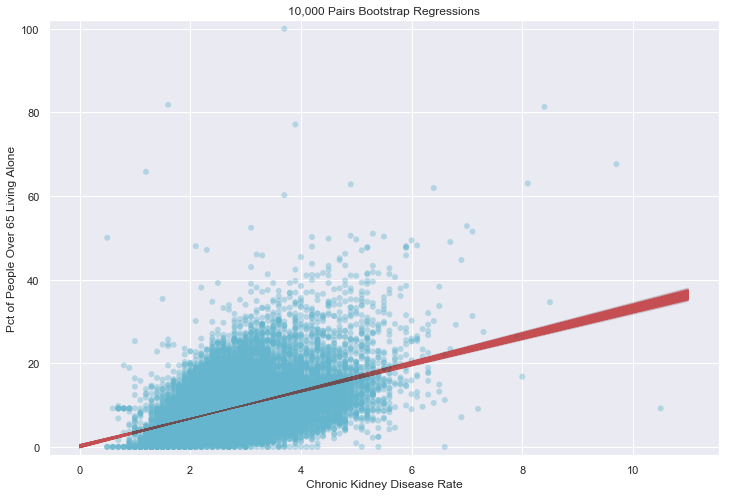

In [55]:
# plot pairs bootstrap 
x = np.array([0,11])

fig, ax12 = plt.subplots(figsize=(12,8))
ax12.scatter(x=alone['CKD'], y=alone['Living_Alone'], 
            alpha=0.4, edgecolor='None', color='c')
for i in range(10000):
    ax12.plot(x, alone_slopes[i] * x + alone_ints[i], linewidth=0.5, alpha=0.02, color='r')
ax12.set_ylabel('Pct of People Over 65 Living Alone')
ax12.set_xlabel('Chronic Kidney Disease Rate')
ax12.set_title('10,000 Pairs Bootstrap Regressions')
ax12.set_ylim(-2, 102)
plt.savefig('img/pairs_bs_alone.png')

## Examine the Role of Sex and Poverty on CKD Rates
H<sub>0</sub>: There is no difference in the male or female rates of poverty on rates regarding their effect on rates of chronic kidney disease.

$\alpha$ = 0.01

To test this hypothesis, we will examine the difference in slopes and Spearman rho ($\rho$) using sample and bootstrap statistics.

In [56]:
poverty = full_df[['Chronic kidney disease among adults', 'Percent below poverty level | Male', 'Percent below poverty level | Female']].copy()
poverty.columns = ['CKD', 'Male_Poverty', 'Female_Poverty']
poverty.describe()

,CKD,Male_Poverty,Female_Poverty
count,26697.000000,26667.000000,26665.000000
mean,2.746252,19.008955,21.713115
std,0.823851,14.391851,15.566591
min,0.500000,0.000000,0.000000
25%,2.200000,7.600000,9.200000
50%,2.600000,15.500000,18.100000
75%,3.100000,27.400000,31.300000
max,10.500000,100.000000,100.000000


In [57]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 26696
Data columns (total 3 columns):
CKD               26697 non-null float64
Male_Poverty      26667 non-null float64
Female_Poverty    26665 non-null float64
dtypes: float64(3)
memory usage: 834.3 KB


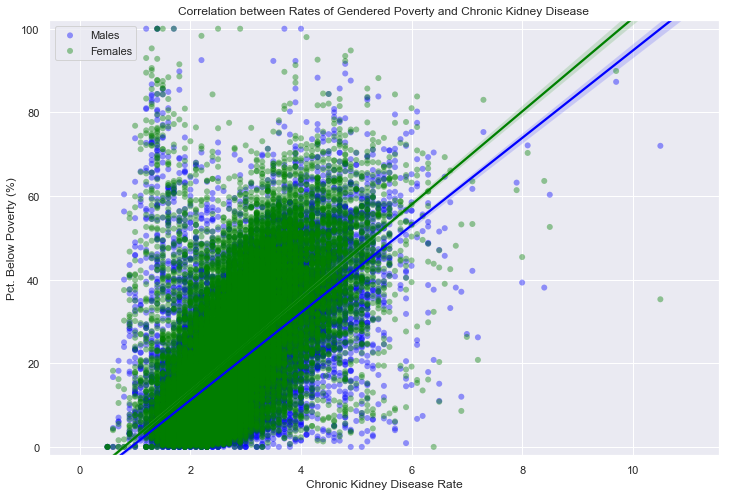

In [60]:
# plot the correlation between Labor Force Participation and CKD rates
fig, ax13 = plt.subplots(figsize=(12,8))
sns.regplot(x='CKD', y='Male_Poverty', data=poverty, label='Males', scatter=True,
            color='blue', scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax13)
sns.regplot(x='CKD', y='Female_Poverty', data=poverty, label='Females', scatter=True,
            color='green', scatter_kws={'alpha':0.4, 'edgecolor':'none'}, ax=ax13)
ax13.set_ylabel('Pct. Below Poverty (%)')
ax13.set_xlabel('Chronic Kidney Disease Rate')
ax13.set_title('Correlation between Rates of Gendered Poverty and Chronic Kidney Disease')
ax13.set_ylim(-2,102)
ax13 = plt.legend()
plt.savefig('img/sex_poverty_ckd_scatter.png')

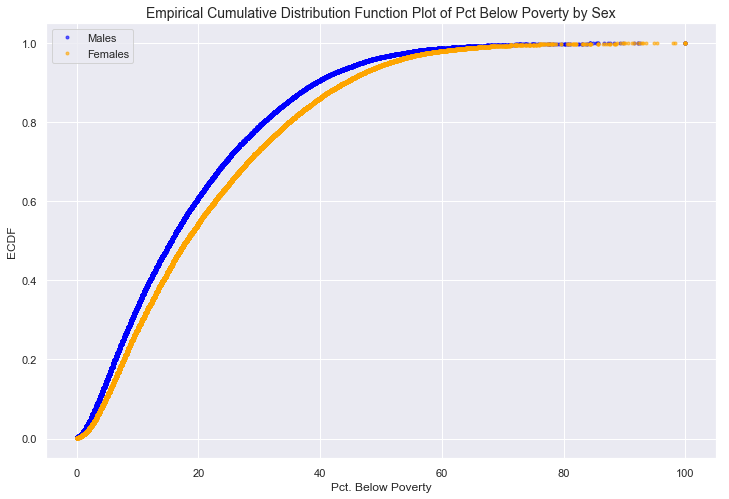

In [61]:
x_male, y_male = ecdf(poverty.Male_Poverty)
x_female, y_female = ecdf(poverty.Female_Poverty)

# plot ECDFs
fig, ax14 = plt.subplots(figsize=(12,8))
ax14.plot(x_male, y_male, label='Males', color='blue', marker='.', linestyle='None', alpha=0.6)
ax14.plot(x_female, y_female, label='Females', color='orange', marker='.', linestyle='None', alpha=0.6)
ax14.set_title('Empirical Cumulative Distribution Function Plot of Pct Below Poverty by Sex', fontsize=14)
ax14.set_xlabel('Pct. Below Poverty')
ax14.set_ylabel('ECDF')
ax14 = plt.legend()

First, we will examine the null hypothesis that there is no difference in the mean percent of women living below the poverty line and the mean percent of men living below the poverty line. We will use a significance level of 1% ($\alpha$ = 0.01).

In [62]:
# calculate descriptive stats for samples
male_mean = poverty.Male_Poverty.mean()
male_std = poverty.Male_Poverty.std()
female_mean = poverty.Female_Poverty.mean()
female_std = poverty.Female_Poverty.std()


var = np.sqrt((female_std**2 / len(poverty.Female_Poverty)) + (male_std**2 / len(poverty.Male_Poverty)))
diff_means = male_mean - female_mean

# generate a normal distribution with sample data
diff_normal_sample = np.random.normal(diff_means, var, 10000)
diff_normal_null = np.random.normal(0, var, 10000)

print('99% Confidence Interval for Null Hypothesis: {}'.format(np.percentile(diff_normal_null, [0.5, 99.5])))
print('Normal 99% confidence interval: {}'.format(np.percentile(diff_normal_sample, [0.5, 99.5])))
print('Difference of means: {:.4f}'.format(diff_means))

#calculate the z-score
z_score = diff_means / var
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(z_score)))

99% Confidence Interval for Null Hypothesis: [-0.3310773   0.33344123]
Normal 99% confidence interval: [-3.02790426 -2.36762235]
Difference of means: -2.7042
z-score: -20.84
p-value: 0.0000


Rejecting the null hypothesis that there is no difference in the effect of male or female rates of poverty regarding their effect on rates of chronic kidney disease.

In [63]:
poverty.dropna(inplace=True)
poverty = poverty.reset_index(drop=True)

In [64]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26662 entries, 0 to 26661
Data columns (total 3 columns):
CKD               26662 non-null float64
Male_Poverty      26662 non-null float64
Female_Poverty    26662 non-null float64
dtypes: float64(3)
memory usage: 625.0 KB


In [65]:
# generate pairs bootstraps for male poverty vs CKD
male_slopes, male_ints, male_r, male_pval, male_r2 = draw_bs_pairs_linreg(x=poverty['CKD'], y=poverty['Male_Poverty'], size=10000)

In [66]:
# generate pairs bootstraps for female poverty vs CKD
female_slopes, female_ints, female_r, female_pval, female_r2 = draw_bs_pairs_linreg(x=poverty['CKD'], y=poverty['Female_Poverty'], size=10000)

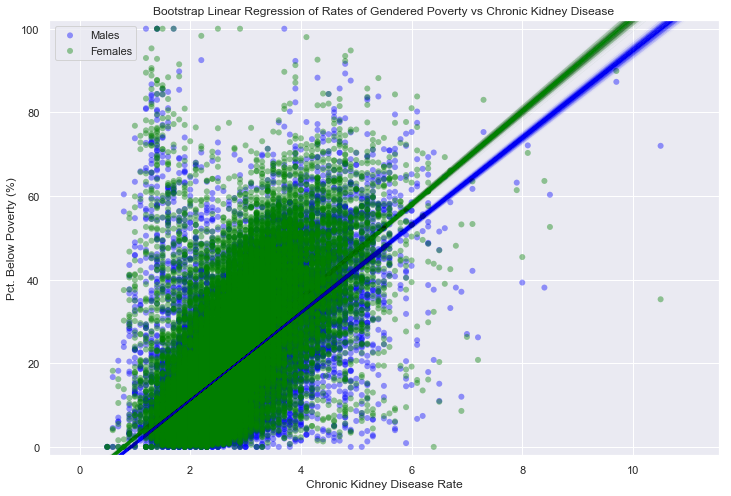

In [67]:
x = np.array([0,11])

fig, ax15 = plt.subplots(figsize=(12,8))
ax15.scatter(x=poverty['CKD'], y=poverty['Male_Poverty'], label='Males',
            color='blue', alpha=0.4, edgecolor='none')
ax15.scatter(x=poverty['CKD'], y=poverty['Female_Poverty'], label='Females',
            color='green', alpha=0.4, edgecolor='none')
for i in range(1000):
    ax15.plot(x, male_slopes[i] * x + male_ints[i], linewidth=0.5, alpha=0.02, color='blue')
    ax15.plot(x, female_slopes[i] * x + female_ints[i], linewidth=0.5, alpha=0.02, color='green')
ax15.set_ylabel('Pct. Below Poverty (%)')
ax15.set_xlabel('Chronic Kidney Disease Rate')
ax15.set_title('Bootstrap Linear Regression of Rates of Gendered Poverty vs Chronic Kidney Disease')
ax15.set_ylim(-2, 102)
ax15 = plt.legend()
plt.savefig('img/sex_poverty_ckd_scatter_bs.png')

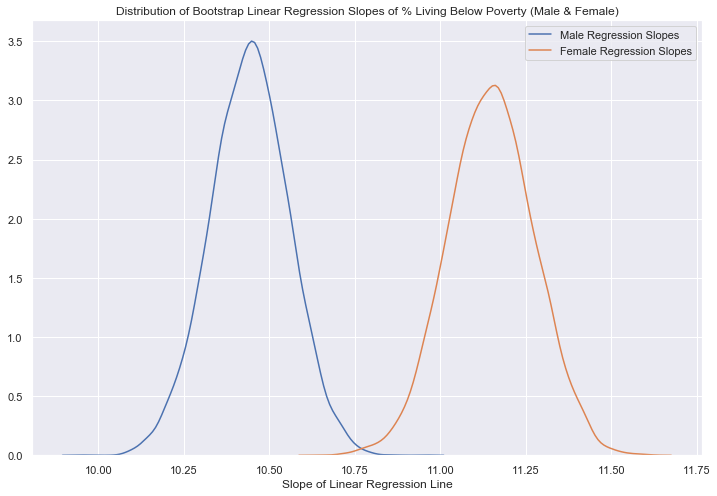

In [68]:
fig, ax16 = plt.subplots(figsize=(12,8))
sns.distplot(male_slopes, hist=False, ax=ax16, label='Male Regression Slopes')
sns.distplot(female_slopes, hist=False, ax=ax16, label='Female Regression Slopes')
ax16.set_xlabel('Slope of Linear Regression Line')
ax16.set_title('Distribution of Bootstrap Linear Regression Slopes of % Living Below Poverty (Male & Female)')
ax16 = plt.legend()

In [69]:
from statsmodels.stats import weightstats as ws

z, p = ws.ztest(male_slopes, female_slopes)

print('z-score: {0:.4f}\np-value: {1:.4f}'.format(z,p))

z-score: -413.6117
p-value: 0.0000


In [70]:
# compute bootstrap difference of mean slope
diff, diff_null, diff_sample, z, t, p = diff_of_means(male_slopes, female_slopes)
    
print('99% confidence interval assuming the nulll hypothesis: {}'.format(np.percentile(diff_null, [0.5,99.5])))
print('Normal 99% confidence interval: {}'.format(np.percentile(diff_sample, [0.5,99.5])))
print('Difference of means: {:.4f}'.format(diff))

print('z-score: {:.2f}'.format(z))
print('p-value: {:.4f}'.format(stats.norm.cdf(z)))

print('-'*100)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t,p))

99% confidence interval assuming the nulll hypothesis: [-0.00434182  0.00443018]
Normal 99% confidence interval: [-0.71078571 -0.70194154]
Difference of means: -0.7063
z-score: -413.63
p-value: 0.0000
----------------------------------------------------------------------------------------------------
t-statistic = -413.61
p-value = 0.0000


In [71]:
# compute bootstrap difference of mean Pearson r
diff, diff_null, diff_sample, z, t, p = diff_of_means(male_r, female_r)

print('\033[1mDifference of Pearson r coefficient\033[0m')
print('-'*100)
print('99% confidence interval assuming the nulll hypothesis: {}'.format(np.percentile(diff_null, [0.5,99.5])))
print('Normal 99% confidence interval: {}'.format(np.percentile(diff_sample, [0.5,99.5])))
print('Difference of means: {:.4f}'.format(diff))

print('z-score: {:.2f}'.format(z))
print('p-value: {:.4f}'.format(stats.norm.cdf(1-z)))

Difference of Pearson r coefficient
----------------------------------------------------------------------------------------------------
99% confidence interval assuming the nulll hypothesis: [-0.00023154  0.00022885]
Normal 99% confidence interval: [0.00804232 0.00850108]
Difference of means: 0.0083
z-score: 93.35
p-value: 0.0000


C:\Users\echri\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


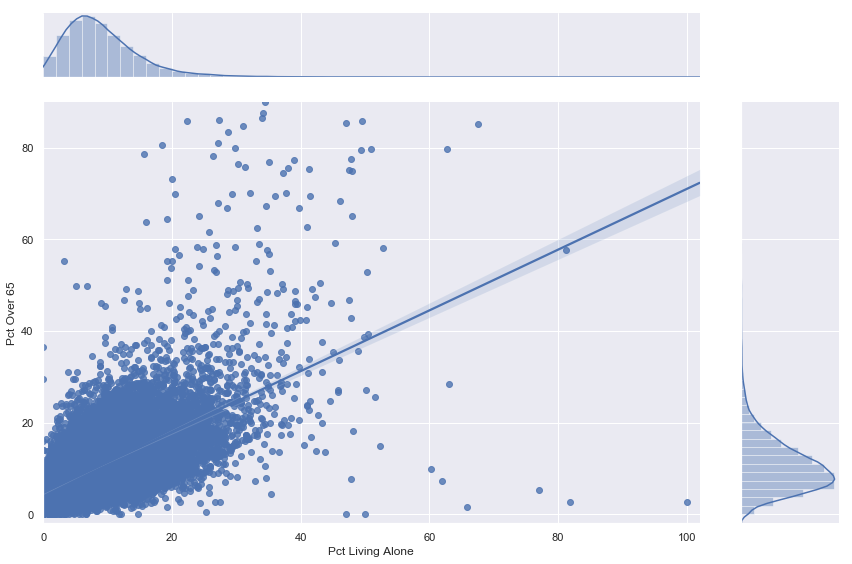

In [74]:
full_df['Over_65'] = full_df['Male | 65-69 years'] + full_df['Male | 70-74 years'] + full_df['Male | 75-79 years'] + full_df['Male | 80-84 years'] + full_df['Male | 85 years and over']

ax17 = sns.jointplot(x='Occupied housing units | HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER | Nonfamily households | Householder living alone | Householder 65 years and over', 
            y='Over_65', data=full_df, kind='reg', ylim=(-2, 90), xlim=(0,102))
ax17.fig.set_figwidth(12)
ax17.fig.set_figheight(8)
ax17.set_axis_labels('Pct Living Alone', 'Pct Over 65')
ax17.fig.tight_layout()
plt.savefig('img/over65_alone.png')